In [65]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [72]:
data=pd.read_csv('C:/Users/zhouwei/Desktop/L8/jetrail/train.csv',index_col=0)

In [73]:
data.Datetime=pd.to_datetime(data.Datetime,format='%d-%m-%Y %H:%M')
data.index=data.Datetime
data.drop(columns=['Datetime'],axis=1,inplace=True)
data=data.resample('D').sum()
data['ds']=data.index
data['y']=data.Count

In [74]:
data.drop(columns=['Count'],axis=1,inplace=True)

In [75]:
model=Prophet(seasonality_prior_scale=0.1)
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
future=model.make_future_dataframe(213)
forcast=model.predict(future)

In [77]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-686.475171,-2281.617563,167.444745,-686.475171,-686.475171,-422.261377,-422.261377,-422.261377,-994.419741,-994.419741,-994.419741,572.158364,572.158364,572.158364,0.0,0.0,0.0,-1108.736549
1,2012-08-26,-678.372660,-2371.444441,-59.358071,-678.372660,-678.372660,-580.221416,-580.221416,-580.221416,-1143.373026,-1143.373026,-1143.373026,563.151610,563.151610,563.151610,0.0,0.0,0.0,-1258.594076
2,2012-08-27,-670.270149,-875.864333,1560.853330,-670.270149,-670.270149,1008.530371,1008.530371,1008.530371,457.243392,457.243392,457.243392,551.286980,551.286980,551.286980,0.0,0.0,0.0,338.260222
3,2012-08-28,-662.167638,-730.880418,1670.103975,-662.167638,-662.167638,1145.292015,1145.292015,1145.292015,607.917190,607.917190,607.917190,537.374825,537.374825,537.374825,0.0,0.0,0.0,483.124376
4,2012-08-29,-654.065127,-806.459198,1600.976816,-654.065127,-654.065127,1078.743296,1078.743296,1078.743296,556.498961,556.498961,556.498961,522.244335,522.244335,522.244335,0.0,0.0,0.0,424.678169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16243.879057,15316.998479,17861.011472,15838.156486,16710.582402,298.002346,298.002346,298.002346,556.498961,556.498961,556.498961,-258.496615,-258.496615,-258.496615,0.0,0.0,0.0,16541.881403
971,2015-04-23,16271.394404,15097.219700,17555.573477,15860.914310,16742.448448,65.168572,65.168572,65.168572,360.140087,360.140087,360.140087,-294.971515,-294.971515,-294.971515,0.0,0.0,0.0,16336.562976
972,2015-04-24,16298.909751,14835.407309,17375.543756,15883.504157,16774.282329,-180.078460,-180.078460,-180.078460,155.993137,155.993137,155.993137,-336.071597,-336.071597,-336.071597,0.0,0.0,0.0,16118.831291
973,2015-04-25,16326.425097,13761.601065,16299.528108,15906.300372,16805.841601,-1375.441635,-1375.441635,-1375.441635,-994.419741,-994.419741,-994.419741,-381.021894,-381.021894,-381.021894,0.0,0.0,0.0,14950.983462


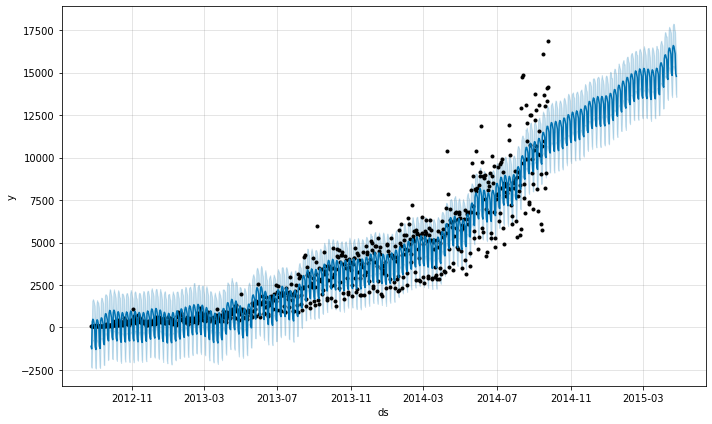

In [78]:
model.plot(forcast)
plt.show()

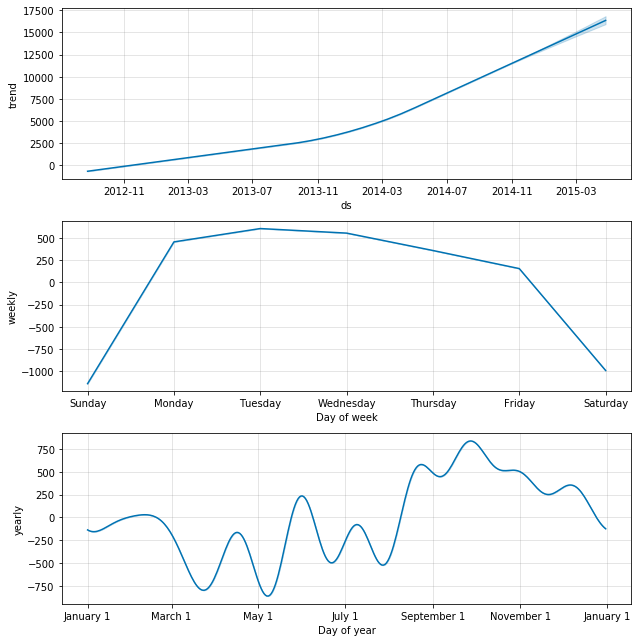

In [79]:
model.plot_components(forcast)
plt.show()

In [ ]:
df=pd.read_csv('C:/Users/zhouwei/Desktop/L8/manning/manning.csv')
model=Prophet()
model.fit(df)
future=model.make_future_dataframe(365)
forcast=model.predict(future)
model.plot(forcast)
plt.show()
model.plot_components(forcast)

m=Prophet(growth='logistic')
df['cap']=8.5
df['floor']=6
m.fit(df)
future=m.make_future_dataframe(365)
future['cap']=8.5
future['floor']=6
fc=m.predict(future)
m.plot(fc)
m=Prophet(changepoints=['2014-01-01'])


m.fit(df)
future=m.make_future_dataframe(365)
forcast=m.predict(future)
m.plot(forcast)

playoff=pd.DataFrame({
    'holiday':'playoff',
    'ds':pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
    'lower_window':0,
    'upper_window':1
})
superbowls=pd.DataFrame({
    'holiday':'superbowl',
    'ds':pd.to_datetime(['2010-02-07','2014-02-02','2016-02-02']),
    'lower_window':0,
    'upper_window':1
})
holiday=pd.concat((playoff,superbowls))
a=Prophet(holidays=holiday,holidays_prior_scale=0.1)
a.fit(df)
future=a.make_future_dataframe(365)
forecast=a.predict(future)
a.plot_components(forcast)